# Haberman Cancer Survival DataSet
Toy Dataset: Haberman Dataset:(https://www.kaggle.com/gilsousa/habermans-survival-data-set)
Attribute Information:
Age of patient at time of operation (numerical)
Patient's year of operation (numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute):
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
OBJECTIVE:
Given a new patient's (age, year-of-operation, count-of-positive-nodes-detected) we want to build a model which predicts if the patient will survive for more than 5 years after the operation or not.
The following is the Exploratory Data Analysis for the same.

In [24]:
#Importing all Modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline




In [5]:

#Load Habermans Survival Dataset
#reading the data to pandas DataFrame
haberman=pd.read_csv('/Users/gopivudanrao/Data_Analysis_in_Python/haberman.csv')

In [6]:
#checking few records from dataset 
haberman.head(5)

,AgeAtOperation,YearOfOperation,NrPosAxillaryNodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [48]:
# (Q) how many data-points and features?
haberman.shape

(306, 4)

In [49]:
#(Q) What are the column names in our dataset?
haberman.columns

Index(['AgeAtOperation', 'YearOfOperation', 'NrPosAxillaryNodes', 'Survival'], dtype='object')

In [66]:
print('Total number of Points')
print(haberman.shape[0])

print('Total number of Features in Dataset')
print(haberman.shape[1])
#value_counts() is used to count distinct values
print('Distinct records for class variable Survival')
print(haberman['Survival'].value_counts())

#225 patients survived more than 5 years after Surgery thats about 73.52% is Survival rate .

Total number of Points
306
Total number of Features in Dataset
4
Distinct records for class variable Survival
1    225
2     81
Name: Survival, dtype: int64


In [50]:
#(Q) How many data points for each class are present? 

haberman["Survival"].value_counts()


1    225
2     81
Name: Survival, dtype: int64

Survival status (class attribute) have two distinct values 
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

# balanced-dataset vs imbalanced datasets
#225 patients survived 5 years or longer and 81 patients died within 5 years
#haberman Dataset is  Imbalanced dataset as the number of data points for every class is different 
73.52% Survived more than 5 years after Surgery
24.5% died within 5 years of Surgery 

In [11]:
def show_missing():
    missing = haberman.columns[haberman.isnull().any()].tolist()
    return missing


In [15]:
#Checking if any data is missing/null in Dataset
print('Missing Data Count')
print(haberman[show_missing()].isnull().sum().sort_values(ascending = False))

#Columns have no Missing values ,All features are populated with values

Missing Data Count
Series([], dtype: float64)


In [20]:
haberman.columns

Index(['AgeAtOperation', 'YearOfOperation', 'NrPosAxillaryNodes', 'Survival'], dtype='object')

In [61]:
# more information about features and their datatypes
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
AgeAtOperation        306 non-null int64
YearOfOperation       306 non-null int64
NrPosAxillaryNodes    306 non-null int64
Survival              306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [63]:
haberman.describe()

,AgeAtOperation,YearOfOperation,NrPosAxillaryNodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118246438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11813da58>]], dtype=object)

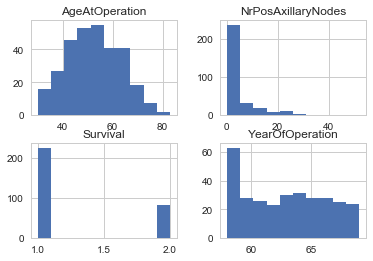

In [37]:
#Feature level Histogram
haberman.hist()

# 2DScatter Plot 

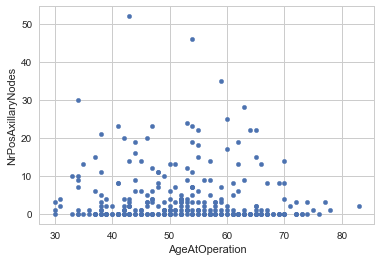

In [125]:
haberman.plot(kind='scatter',x='AgeAtOperation',y='NrPosAxillaryNodes')

Observation :
1.Most of data points have 0 "NrPosAxillaryNodes" but Cannot Distinuish 
   much of data points based on class label with scatter plot.
2.cannot make much sense out of it. 
#What if we color the points by thier class-label?

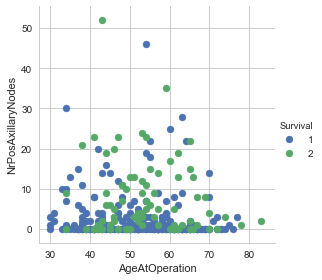

In [127]:
#Using Seaborn utilities  to distinguish the points by class Label 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival", size=4) \
   .map(plt.scatter, "AgeAtOperation", "NrPosAxillaryNodes") \
   .add_legend();
plt.show();



Obervation : 
1. The plot distinuishes data points Separates Survival data points with color blue and green
2. AgeatOperation and NrPosAxillaryNodes features are useful for determining  Survival class label
3. Many Survived have 0 NrPosAxillaryNodes
4. Patients died within 5 years have more than 1 NrPosAxillaryNodes and ageatoperation greater than 50 

# Pair Plot to visualize all features to determine which is best for predicting class label 

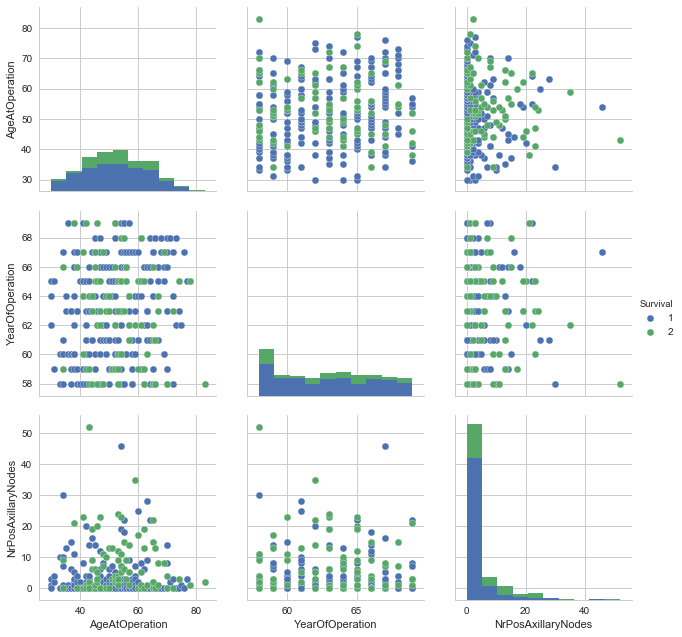

In [72]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival",
             vars=['AgeAtOperation', 'YearOfOperation', 'NrPosAxillaryNodes'], size=3)
plt.show()

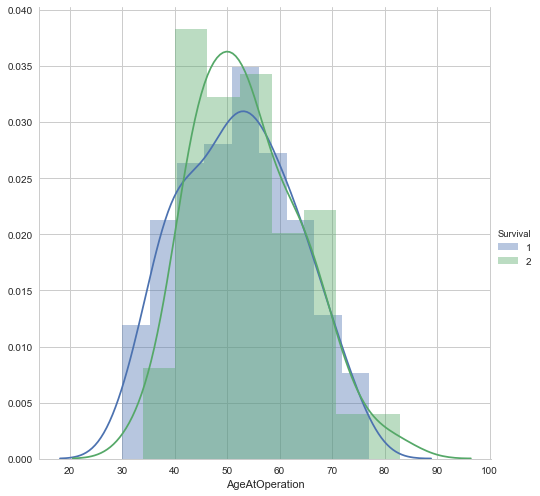

In [36]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival',size=7).map(sns.distplot,'AgeAtOperation').add_legend()
plt.show()

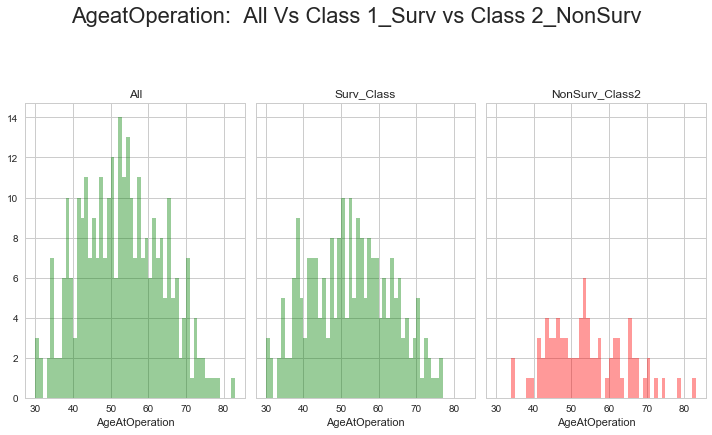

In [154]:
# 1. Studying 'ageatOperation' feature

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

plt.suptitle("AgeatOperation:  All Vs Class 1_Surv vs Class 2_NonSurv", y=1.2, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title('All')
sns.distplot(haberman['AgeAtOperation'], 
             bins=range(min(haberman['AgeAtOperation']), max(haberman['AgeAtOperation']) + 1), 
             color='g', kde=False, ax=axs[0])
axs[1].set_title('Surv_Class')
sns.distplot(Surv['AgeAtOperation'], 
             bins=range(min(Surv['AgeAtOperation']), max(Surv['AgeAtOperation']) + 1), 
             color='g', kde=False, ax=axs[1])


axs[2].set_title('NonSurv_Class2')
sns.distplot(NonSurv['AgeAtOperation'], 
             bins=range(min(NonSurv['AgeAtOperation']), max(NonSurv['AgeAtOperation']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

Observation:
    The AgeatOperation attribute feature have significance with regard to Survival rate. The patients survived 
    after surgery for more than 5 years have less than 40 years 
    
    

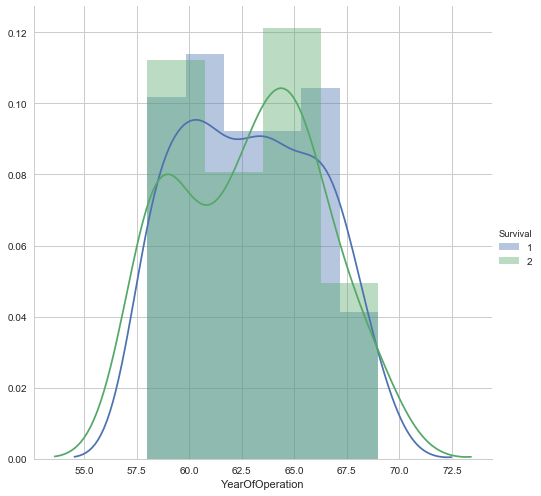

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival',size=7).map(sns.distplot,'YearOfOperation').add_legend()
plt.show()


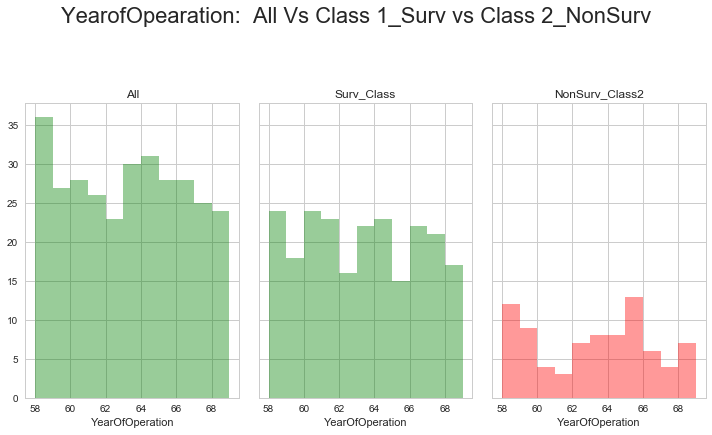

In [121]:
# 2. Studying 'YearofOperation' feature

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

plt.suptitle("YearofOpearation:  All Vs Class 1_Surv vs Class 2_NonSurv", y=1.2, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title('All')
sns.distplot(haberman['YearOfOperation'], 
             bins=range(min(haberman['YearOfOperation']), max(haberman['YearOfOperation']) + 1), 
             color='g', kde=False, ax=axs[0])
axs[1].set_title('Surv_Class')
sns.distplot(Surv['YearOfOperation'], 
             bins=range(min(Surv['YearOfOperation']), max(Surv['YearOfOperation']) + 1), 
             color='g', kde=False, ax=axs[1])


axs[2].set_title('NonSurv_Class2')
sns.distplot(NonSurv['YearOfOperation'], 
             bins=range(min(NonSurv['YearOfOperation']), max(NonSurv['YearOfOperation']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

Observation :
    1.There is not much we can infer from feature YearofOperation as the distribution look similar for
    both Survided and dead 
    2.From the year distribution, we can observe that people who didnt survive suddenly fall and rise
    in between 1958 and 1961.
    
    There is too much overlap of data points  for both classes survived and dead 
    for feature Year of Operation. It does not seem to have any prominent effect on patient's survival status.
    
    
    

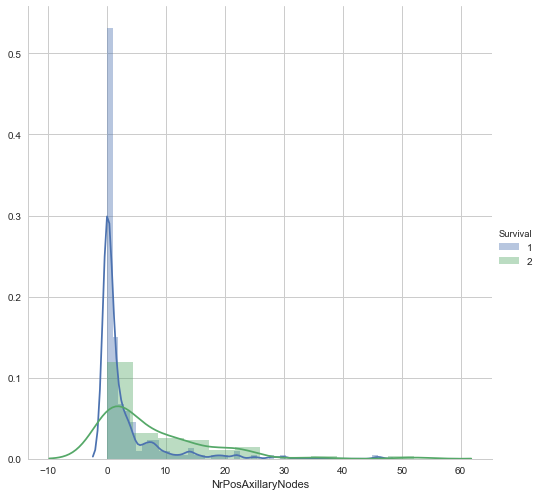

In [39]:
#NrPosAxillaryNodes
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival',size=7).map(sns.distplot,'NrPosAxillaryNodes').add_legend()
plt.show()

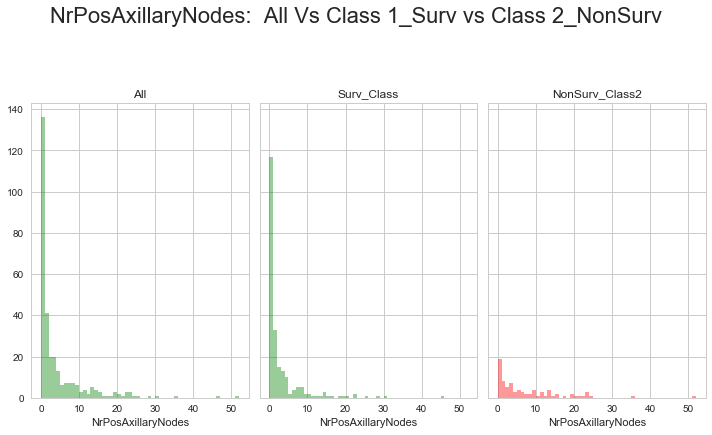

In [132]:
# 2. Studying 'Yearofoperation' feature

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

plt.suptitle("NrPosAxillaryNodes:  All Vs Class 1_Surv vs Class 2_NonSurv", y=1.2, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title('All')
sns.distplot(haberman['NrPosAxillaryNodes'], 
             bins=range(min(haberman['NrPosAxillaryNodes']), max(haberman['NrPosAxillaryNodes']) + 1), 
             color='g', kde=False, ax=axs[0])
axs[1].set_title('Surv_Class')
sns.distplot(Surv['NrPosAxillaryNodes'], 
             bins=range(min(Surv['NrPosAxillaryNodes']), max(Surv['NrPosAxillaryNodes']) + 1), 
             color='g', kde=False, ax=axs[1])


axs[2].set_title('NonSurv_Class2')
sns.distplot(NonSurv['NrPosAxillaryNodes'], 
             bins=range(min(NonSurv['NrPosAxillaryNodes']), max(NonSurv['NrPosAxillaryNodes']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

Observation:
    NRPosAxillaryNodes feature have significance with Survival Rate. 
    Most survival patients have less than 5 PosAxillary nodes . This is very useful feature
    

# PDF and CDF for class label

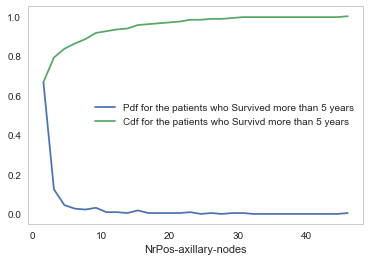

In [97]:
Surv = haberman.loc[haberman["Survival"]==1];
NonSurv = haberman.loc[haberman["Survival"] == 2];
counts,bin_edges=np.histogram(Surv['NrPosAxillaryNodes'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who Survived more than 5 years',
            'Cdf for the patients who Survivd more than 5 years'])
plt.xlabel('NrPos-axillary-nodes')
plt.grid()


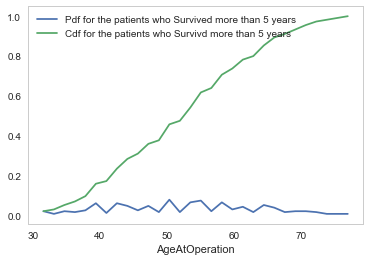

In [147]:
counts,bin_edges=np.histogram(Surv['AgeAtOperation'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who Survived more than 5 years',
            'Cdf for the patients who Survivd more than 5 years'])
plt.xlabel('AgeAtOperation')
plt.grid()

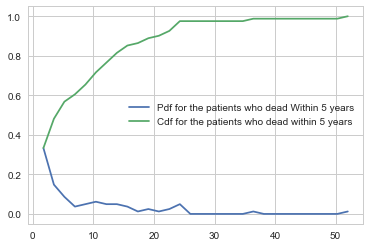

In [92]:

counts,bin_edges=np.histogram(NonSurv['NrPosAxillaryNodes'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years',
            'Cdf for the patients who dead within 5 years'])
plt.show()

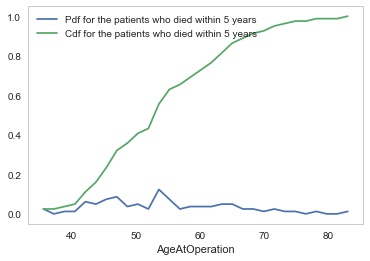

In [149]:

counts,bin_edges=np.histogram(NonSurv['AgeAtOperation'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who died within 5 years',
            'Cdf for the patients who died within 5 years'])
plt.xlabel('AgeAtOperation')
plt.grid()



Observation
1.Looking at pdf,cdf plots the  Ageatoperation of patients Survived having less than 40 years is about 20%
while Ageatoperation for patients dead having less than 40 years is less than 5% .
2. Looking at pdf,cdf plots for NrPosAxillaryNodes,the patients survived more than 5 years with less than 
   5 PosAxillary Nodes at time of surgery is about 75%.
3.  NrPosAxillaryNodes for patients dead having less than 5 NrPosAxillary nodes at time of surgery is 25%. 
    75% of patients having more than 5 NrPosAxillary nodes died within 5 years




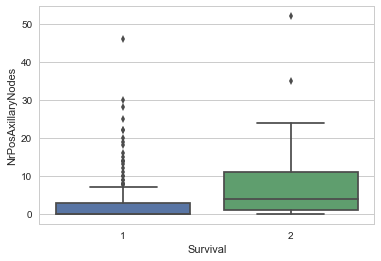

In [137]:
sns.boxplot(x='Survival',y='NrPosAxillaryNodes',data=haberman)
plt.show()

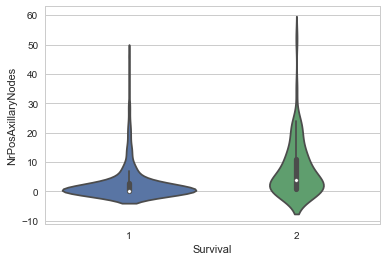

In [135]:
sns.violinplot(x='Survival',y='NrPosAxillaryNodes',data=haberman,size=8)
plt.show()


# Mean and Std Deviation,IQR,Min and Max for  class Label

In [130]:
 
Surv.describe()



,AgeAtOperation,YearOfOperation,NrPosAxillaryNodes,Survival
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [131]:
#Mean and Std Deviation,IQR,Min and Max for Survival class 
NonSurv.describe()

,AgeAtOperation,YearOfOperation,NrPosAxillaryNodes,Survival
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [146]:
print("Total: Number of Patient whose age <40 = {}"
      .format(len(haberman[haberman['AgeAtOperation']<=40])))
print("Class 1: Number of Patient whose age <40 = {}"
      .format(len(Surv[Surv['AgeAtOperation']<=40])))
print("Class 2: Number of Patient whose age <40 = {}"
      .format(len(NonSurv[NonSurv['AgeAtOperation']<=40])))

Total: Number of Patient whose age <40 = 43
Class 1: Number of Patient whose age <40 = 39
Class 2: Number of Patient whose age <40 = 4


In [152]:
print("Total: Number of Patient whose PosAxillary Nodes  <3 = {}"
      .format(len(haberman[haberman['NrPosAxillaryNodes']<3])))
print("Class 1: Number of Patient whose PosAxillary Nodes <3 = {}"
      .format(len(Surv[Surv['NrPosAxillaryNodes']<=3])))
print("Class 2: Number of Patient whose PosAxillary Nodes <3 = {}"
      .format(len(NonSurv[NonSurv['NrPosAxillaryNodes']<=3])))

Total: Number of Patient whose PosAxillary Nodes  <3 = 197
Class 1: Number of Patient whose PosAxillary Nodes <3 = 178
Class 2: Number of Patient whose PosAxillary Nodes <3 = 39


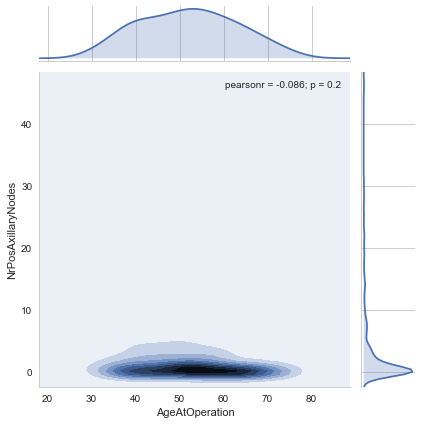

In [142]:
sns.jointplot(x="AgeAtOperation", y="NrPosAxillaryNodes", data=Surv, kind="kde");
plt.show();

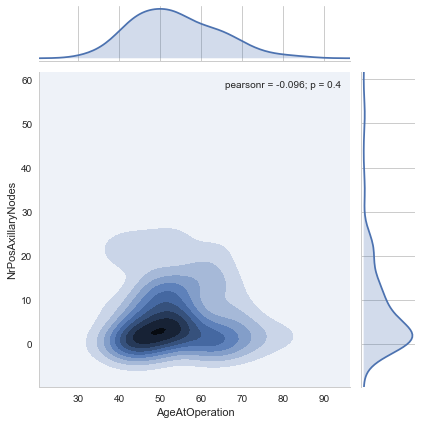

In [143]:
sns.jointplot(x="AgeAtOperation", y="NrPosAxillaryNodes", data=NonSurv, kind="kde");
plt.show();

# Conclusion
1.	All patients < 34 years of AgeAtOperation  survived for more than 5 years
2.	No patient > 77 years of AgeAtOperation survived for more than 5 years
3.	If patient's AgeAtOperation is <= 40 at the time of operation, chances of survival for more than 5 years 
    is significantly  higher at 90%(39/43)
4. Year of Operation doesn't seem to have any prominent effect on patient's survival status.
5. 44% of patients are detected with 0 NrPosAxillaryNodes
6. Also found that the maximum number of nodes detected for any patient is 52, 86% of patients are detected 
   with < 10 NrPosAxillaryNodes
7. 75% of patients who survived for more than 5 years after the operation had NrPosAxillaryNodes <=3
8. 50% of patients who died within 5 years after the Surgery had NrPosAxillaryNodes >4
